(debugging)=
```{raw} jupyter
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

# Debugging and Handling Errors

```{index} single: Debugging
```

```{epigraph}
"Debugging is twice as hard as writing the code in the first place.
Therefore, if you write the code as cleverly as possible, you are, by definition,
not smart enough to debug it." -- Brian Kernighan
```

## Overview

Are you one of those programmers who fills their code with `print` statements when trying to debug their programs?

Hey, we all used to do that.

(OK, sometimes we still do that...)

But once you start writing larger programs you'll need a better system.

You may also want to handle potential errors in your code as they occur.

In this lecture, we will discuss how to debug our programs and improve error handling.

## Debugging

```{index} single: Debugging
```

Debugging tools for Python vary across platforms, IDEs and editors.

For example, a [visual debugger](https://jupyterlab.readthedocs.io/en/stable/user/debugger.html) is available in JupyterLab.

Here we'll focus on Jupyter Notebook and leave you to explore other settings.

We'll need the following imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

(debug_magic)= 
### The `debug` Magic

Let's consider a simple (and rather contrived) example

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

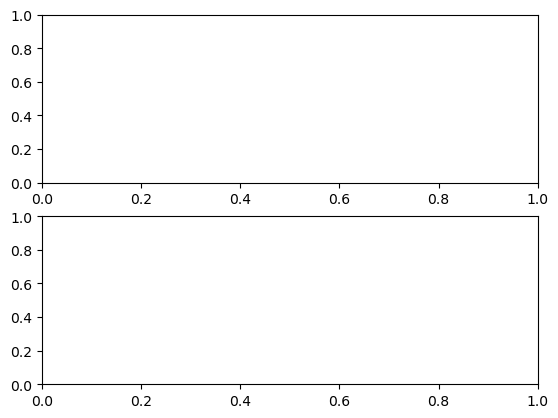

In [2]:
def plot_log():
    fig, ax = plt.subplots(2, 1)
    x = np.linspace(1, 2, 10)
    ax.plot(x, np.log(x))
    plt.show()

plot_log()  # Call the function, generate plot

This code is intended to plot the `log` function over the interval $[1, 2]$.

But there's an error here: `plt.subplots(2, 1)` should be just `plt.subplots()`.

(The call `plt.subplots(2, 1)` returns a NumPy array containing two axes objects, suitable for having two subplots on the same figure)

The traceback shows that the error occurs at the method call `ax.plot(x, np.log(x))`.

The error occurs because we have mistakenly made `ax` a NumPy array, and a NumPy array has no `plot` method.

But let's pretend that we don't understand this for the moment.

We might suspect there's something wrong with `ax` but when we try to investigate this object, we get the following exception:

In [3]:
ax

NameError: name 'ax' is not defined

The problem is that `ax` was defined inside `plot_log()`, and the name is
lost once that function terminates.

Let's try doing it a different way.

We run the first cell block again, generating the same error

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

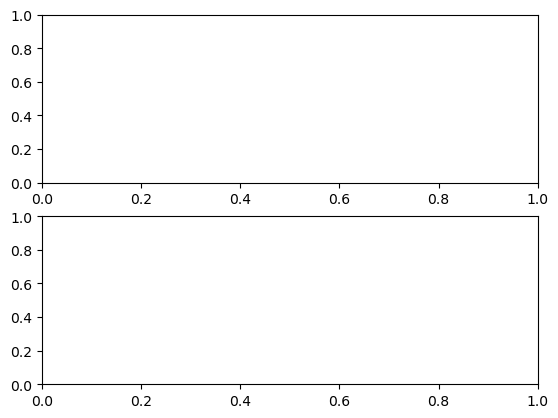

In [4]:
def plot_log():
    fig, ax = plt.subplots(2, 1)
    x = np.linspace(1, 2, 10)
    ax.plot(x, np.log(x))
    plt.show()

plot_log()  # Call the function, generate plot

But this time we type in the following cell block

```{code-block} ipython
:class: no-execute
%debug
```

You should be dropped into a new prompt that looks something like this

```{code-block} ipython
:class: no-execute
ipdb>
```

(You might see pdb> instead)

Now we can investigate the value of our variables at this point in the program, step forward through the code, etc.

For example, here we simply type the name `ax` to see what's happening with
this object:

```{code-block} ipython
:class: no-execute
ipdb> ax
array([<matplotlib.axes.AxesSubplot object at 0x290f5d0>,
       <matplotlib.axes.AxesSubplot object at 0x2930810>], dtype=object)
```

It's now very clear that `ax` is an array, which clarifies the source of the
problem.

To find out what else you can do from inside `ipdb` (or `pdb`), use the
online help

```{code-block} ipython
:class: no-execute
ipdb> h

Documented commands (type help <topic>):
========================================
EOF    bt         cont      enable  jump  pdef   r        tbreak   w
a      c          continue  exit    l     pdoc   restart  u        whatis
alias  cl         d         h       list  pinfo  return   unalias  where
args   clear      debug     help    n     pp     run      unt
b      commands   disable   ignore  next  q      s        until
break  condition  down      j       p     quit   step     up

Miscellaneous help topics:
==========================
exec  pdb

Undocumented commands:
======================
retval  rv

ipdb> h c
c(ont(inue))
Continue execution, only stop when a breakpoint is encountered.
```

### Setting a Break Point

The preceding approach is handy but sometimes insufficient.

Consider the following modified version of our function above

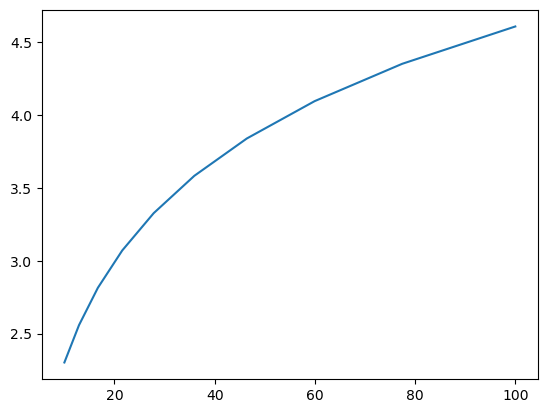

In [5]:
def plot_log():
    fig, ax = plt.subplots()
    x = np.logspace(1, 2, 10)
    ax.plot(x, np.log(x))
    plt.show()

plot_log()

Here the original problem is fixed, but we've accidentally written
`np.logspace(1, 2, 10)` instead of `np.linspace(1, 2, 10)`.

Now there won't be any exception, but the plot won't look right.

To investigate, it would be helpful if we could inspect variables like `x` during execution of the function.

To this end, we add a "break point" by inserting  `breakpoint()` inside the function code block

```{code-block} python3
:class: no-execute
def plot_log():
    breakpoint()
    fig, ax = plt.subplots()
    x = np.logspace(1, 2, 10)
    ax.plot(x, np.log(x))
    plt.show()

plot_log()
```

Now let's run the script, and investigate via the debugger

```{code-block} ipython
:class: no-execute
> <ipython-input-6-a188074383b7>(6)plot_log()
-> fig, ax = plt.subplots()
(Pdb) n
> <ipython-input-6-a188074383b7>(7)plot_log()
-> x = np.logspace(1, 2, 10)
(Pdb) n
> <ipython-input-6-a188074383b7>(8)plot_log()
-> ax.plot(x, np.log(x))
(Pdb) x
array([ 10.        ,  12.91549665,  16.68100537,  21.5443469 ,
        27.82559402,  35.93813664,  46.41588834,  59.94842503,
        77.42636827, 100.        ])
```

We used `n` twice to step forward through the code (one line at a time).

Then we printed the value of `x` to see what was happening with that variable.

To exit from the debugger, use `q`.

### Other Useful Magics

In this lecture, we used the `%debug` IPython magic.

There are many other useful magics:

* `%precision 4` sets printed precision for floats to 4 decimal places
* `%whos` gives a list of variables and their values
* `%quickref` gives a list of magics

The full list of magics is [here](http://ipython.readthedocs.org/en/stable/interactive/magics.html).


## Handling Errors

```{index} single: Python; Handling Errors
```

Sometimes it's possible to anticipate bugs and errors as we're writing code.

For example, the unbiased sample variance of sample $y_1, \ldots, y_n$
is defined as

$$
s^2 := \frac{1}{n-1} \sum_{i=1}^n (y_i - \bar y)^2
\qquad \bar y = \text{ sample mean}
$$

This can be calculated in NumPy using `np.var`.

But if you were writing a function to handle such a calculation, you might
anticipate a divide-by-zero error when the sample size is one.

One possible action is to do nothing --- the program will just crash, and spit out an error message.

But sometimes it's worth writing your code in a way that anticipates and deals with runtime errors that you think might arise.

Why?

* Because the debugging information provided by the interpreter is often less useful than what can be provided by a well written error message.
* Because errors that cause execution to stop interrupt workflows.
* Because it reduces confidence in your code on the part of your users (if you are writing for others).


In this section, we'll discuss different types of errors in Python and techniques to handle potential errors in our programs.

### Errors in Python

We have seen `AttributeError` and `NameError` in {any}`our previous examples <debug_magic>`.

In Python, there are two types of errors -- syntax errors and exceptions.

```{index} single: Python; Exceptions
```

Here's an example of a common error type

In [6]:
def f:

SyntaxError: expected '(' (2899452834.py, line 1)

Since illegal syntax cannot be executed, a syntax error terminates execution of the program.

Here's a different kind of error, unrelated to syntax

In [7]:
1 / 0

ZeroDivisionError: division by zero

Here's another

In [8]:
x1 = y1

NameError: name 'y1' is not defined

And another

In [9]:
'foo' + 6

TypeError: can only concatenate str (not "int") to str

And another

In [10]:
X = []
x = X[0]

IndexError: list index out of range

On each occasion, the interpreter informs us of the error type

* `NameError`, `TypeError`, `IndexError`, `ZeroDivisionError`, etc.

In Python, these errors are called *exceptions*.

### Assertions

```{index} single: Python; Assertions
```

Sometimes errors can be avoided by checking whether your program runs as expected.

A relatively easy way to handle checks is with the `assert` keyword.

For example, pretend for a moment that the `np.var` function doesn't
exist and we need to write our own

In [11]:
def var(y):
    n = len(y)
    assert n > 1, 'Sample size must be greater than one.'
    return np.sum((y - y.mean())**2) / float(n-1)

If we run this with an array of length one, the program will terminate and
print our error message

In [12]:
var([1])

AssertionError: Sample size must be greater than one.

The advantage is that we can

* fail early, as soon as we know there will be a problem
* supply specific information on why a program is failing

### Handling Errors During Runtime

```{index} single: Python; Runtime Errors
```

The approach used above is a bit limited, because it always leads to
termination.

Sometimes we can handle errors more gracefully, by treating special cases.

Let's look at how this is done.

#### Catching Exceptions

We can catch and deal with exceptions using `try` -- `except` blocks.

Here's a simple example

In [13]:
def f(x):
    try:
        return 1.0 / x
    except ZeroDivisionError:
        print('Error: division by zero.  Returned None')
    return None

When we call `f` we get the following output

In [14]:
f(2)

0.5

In [15]:
f(0)

Error: division by zero.  Returned None


In [16]:
f(0.0)

Error: division by zero.  Returned None


The error is caught and execution of the program is not terminated.

Note that other error types are not caught.

If we are worried the user might pass in a string, we can catch that error too

In [17]:
def f(x):
    try:
        return 1.0 / x
    except ZeroDivisionError:
        print('Error: Division by zero.  Returned None')
    except TypeError:
        print(f'Error: x cannot be of type {type(x)}.  Returned None')
    return None

Here's what happens

In [18]:
f(2)

0.5

In [19]:
f(0)

Error: Division by zero.  Returned None


In [20]:
f('foo')

Error: x cannot be of type <class 'str'>.  Returned None


If we feel lazy we can catch these errors together

In [21]:
def f(x):
    try:
        return 1.0 / x
    except:
        print(f'Error.  An issue has occurred with x = {x} of type: {type(x)}')
    return None

Here's what happens

In [22]:
f(2)

0.5

In [23]:
f(0)

Error.  An issue has occurred with x = 0 of type: <class 'int'>


In [24]:
f('foo')

Error.  An issue has occurred with x = foo of type: <class 'str'>


In general it's better to be specific.


## Exercises

```{exercise-start}
:label: debug_ex1
```

Suppose we have a text file `numbers.txt` containing the following lines

```{code-block} none
:class: no-execute

prices
3
8

7
21
```

Using `try` -- `except`, write a program to read in the contents of the file and sum the numbers, ignoring lines without numbers.

You can use the `open()` function we learnt {any}`before<iterators>` to open `numbers.txt`.
```{exercise-end}
```


```{solution-start} debug_ex1
:class: dropdown
```

Let's save the data first

In [25]:
%%file numbers.txt
prices
3
8

7
21

Writing numbers.txt


In [26]:
f = open('numbers.txt')

total = 0.0
for line in f:
    try:
        total += float(line)
    except ValueError:
        pass

f.close()

print(total)

39.0


```{solution-end}
```